In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from gstools import SRF, Gaussian,CovModel

from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW

In [2]:
class GWR_gau(CovModel):
    def correlation(self,r):
        return np.exp(-0.5*(r/self.len_scale)**2)

In [3]:
size=40
model = GWR_gau(dim=2, var=1,len_scale=6)
srf = SRF(model,mean=0,seed=555)
b0 = srf.structured([range(size),range(size)]).reshape(-1)
b0 = (b0 - b0.mean())/b0.std() + 2

In [4]:
size=40
model = GWR_gau(dim=2, var=1,len_scale=12)
srf = SRF(model,mean=0,seed=888)
b1 = srf.structured([range(size),range(size)]).reshape(-1)
b1 = (b1 - b1.mean())/b1.std() + 2

In [5]:
print(np.std(b1))

1.0


In [6]:
b2 = np.ones(size*size).reshape(-1)*2

In [7]:
def plot_1(b,title='',vmin=None,vmax=None):
    plt.imshow(b.reshape(size,size),cmap=plt.cm.get_cmap('viridis',8),vmin=vmin,vmax=vmax)
    plt.title(title)
    plt.colorbar()
    
def plot_s(b,sub_title=['','','',''],vmin=None,vmax=None):
    k = len(b)
    fig, axs = plt.subplots(1, k,figsize=(6*k,4))
    for i in range(k):
        if i == 0:
            ax = axs[i].imshow(b[i].reshape(size,size),
                               cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        else:
            ax = axs[i].imshow(b[i].reshape(size,size),cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        axs[i].set_title(sub_title[i],fontsize=16)
        fig.colorbar(ax, ax=axs[i])

        axs[i].set_xticks(np.arange(-0.5, 40, 5))
        axs[i].set_yticks(np.arange(-0.5, 40, 5))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        axs[i].tick_params(axis='x', colors=(0,0,0,0))
        axs[i].tick_params(axis='y', colors=(0,0,0,0))
        
        #axs[i].grid(color='black', linewidth=1)
        

    #fig.suptitle(title, fontsize=16)

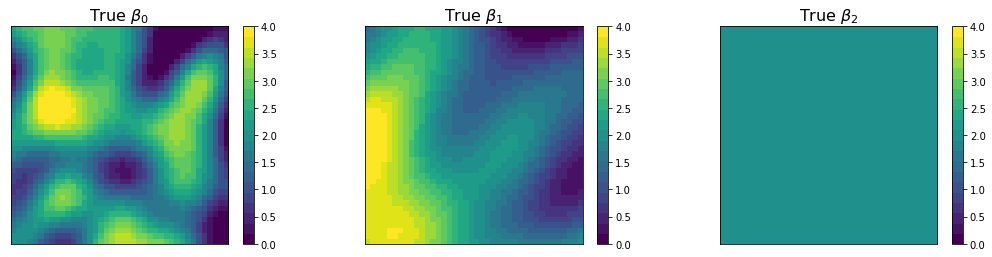

In [8]:
plot_s(np.vstack([b0,b1,b2]),[r"True $\beta_0$",r"True $\beta_1$",r"True $\beta_2$"],vmin=0,vmax=4)

#plt.savefig("processes.png",dpi=300)

In [9]:
np.random.seed(222)
X1 = np.random.randn(size*size)*1
X2 = np.random.randn(size*size)*1
X3 = np.random.randn(size*size)*1

X = np.vstack([X1,X2]).T
u = np.array([np.linspace(0,size-1,num=size)]*size).reshape(-1)
v = np.array([np.linspace(0,size-1,num=size)]*size).T.reshape(-1)
coords = list(zip(u,v))

k = X.shape[1];n = X.shape[0]

In [10]:
f0 = b0
f1 = b1*X1
f2 = b2*X2

In [11]:
mc_inters = 1000

In [12]:
%%time

mgwr_R2 = []
mgwr_params = []
mgwr_bws = []
mgwr_res = []

for iter in range(mc_inters):
    
    err = np.random.randn(size*size)*1
    
    y = (f0 + f1 + f2 + err).reshape(-1,1)
    
    sel = Sel_BW(coords,y,X,constant=True,multi=True)
    bws = sel.search(multi_bw_min=[2])
    print(iter,bws)
    rslt = MGWR(coords,y,X,selector=sel).exact_fit()
    
    mgwr_bws.append(bws)
    mgwr_params.append(sel.params)
    mgwr_res.append(rslt.resid_response)

    

0 [  52.  124. 1599.]


1 [  46.   71. 1596.]


2 [  46.   90. 1368.]


3 [ 46.  98. 497.]


4 [  54.  114. 1542.]


5 [ 46.  90. 845.]


6 [  38.   98. 1597.]


7 [ 46. 103. 629.]


8 [  52.  123. 1599.]


9 [  46.  125. 1058.]


10 [  52.  102. 1599.]


11 [  46.  102. 1598.]


12 [  54.  133. 1599.]


13 [  46.   98. 1599.]


14 [  53.   99. 1595.]


15 [  50.   70. 1597.]


16 [  54.  106. 1599.]


17 [  46.  103. 1566.]


18 [  65.   94. 1599.]


19 [ 46.  98. 995.]


20 [  50.  110. 1599.]


21 [  46.  103. 1598.]


22 [  46.  124. 1599.]


23 [  54.   99. 1597.]


24 [  46.   98. 1599.]


25 [  46.   70. 1595.]


26 [  46.   98. 1456.]


27 [  46.  126. 1599.]


28 [  46.  102. 1003.]


29 [  52.  111. 1599.]


30 [  46.  103. 1336.]


31 [ 50.  98. 242.]


32 [  53.   98. 1599.]


33 [  46.   71. 1599.]


34 [  52.   70. 1568.]


35 [ 50. 105. 955.]


36 [  50.  123. 1531.]


37 [  38.  102. 1599.]


38 [  46.  124. 1590.]


39 [  52.   90. 1599.]


40 [  46.   98. 1595.]


41 [ 46. 103. 990.]


42 [  46.  125. 1599.]


43 [  46.  123. 1599.]


44 [  46.   98. 1599.]


45 [  46.   98. 1599.]


46 [  46.  115. 1599.]


47 [ 46. 102. 390.]


48 [  46.  124. 1599.]


49 [  38.  124. 1599.]


50 [  38.  103. 1596.]


51 [  46.  104. 1599.]


52 [  46.   99. 1566.]


53 [  53.  125. 1597.]


54 [  52.   94. 1599.]


55 [  52.   90. 1599.]


56 [ 46. 125. 598.]


57 [ 46. 123. 322.]


58 [  54.   98. 1599.]


59 [ 46. 107. 353.]


60 [  38.   90. 1594.]


61 [  46.   90. 1595.]


62 [ 46.  94. 366.]


63 [  38.   71. 1597.]


64 [  46.  102. 1599.]


65 [  53.   99. 1599.]


66 [  49.  101. 1599.]


67 [  46.   99. 1599.]


68 [ 46. 103. 177.]


69 [ 38. 112. 922.]


70 [  38.  102. 1366.]


71 [  52.   99. 1599.]


72 [ 53.  70. 728.]


73 [ 65. 103. 492.]


74 [  50.  146. 1599.]


75 [  50.  103. 1579.]


76 [  52.  125. 1599.]


77 [  46.  128. 1599.]


78 [  38.   99. 1599.]


79 [  46.  102. 1578.]


80 [  52.   70. 1192.]


81 [  46.  103. 1595.]


82 [  52.  103. 1599.]


83 [  46.   90. 1320.]


84 [  46.  122. 1599.]


85 [  50.   71. 1597.]


86 [ 46. 102. 672.]


87 [ 46. 102. 968.]


88 [  46.  103. 1599.]


89 [  46.   98. 1599.]


90 [ 54.  90. 443.]


91 [  53.  102. 1599.]


92 [ 46.  98. 865.]


93 [  46.  103. 1597.]


94 [  46.  124. 1599.]


95 [  53.  112. 1598.]


96 [  47.   98. 1599.]


97 [  46.  102. 1595.]


98 [  50.  146. 1224.]


99 [  50.  122. 1454.]


100 [ 46.  98. 358.]


101 [  46.   99. 1599.]


102 [ 38.  70. 557.]


103 [ 38. 122. 769.]


104 [  46.  102. 1599.]


105 [  46.  146. 1599.]


106 [  54.  125. 1599.]


107 [  49.   99. 1573.]


108 [  46.   98. 1599.]


109 [  70.  103. 1579.]


110 [  46.  103. 1596.]


111 [ 46. 123. 700.]


112 [ 46.  90. 511.]


113 [  46.  103. 1599.]


114 [  46.  103. 1599.]


115 [  46.  110. 1594.]


116 [  46.  122. 1414.]


117 [  46.  146. 1599.]


118 [  38.   70. 1599.]


119 [  46.   90. 1599.]


120 [  46.  102. 1599.]


121 [  54.   98. 1599.]


122 [ 46. 112. 480.]


123 [ 55. 146. 552.]


124 [ 46.  90. 245.]


125 [  38.   70. 1599.]


126 [ 46. 114. 387.]


127 [  46.   98. 1268.]


128 [  52.  123. 1599.]


129 [  46.  110. 1596.]


130 [  46.   98. 1599.]


131 [  52.  115. 1309.]


132 [  46.  114. 1154.]


133 [  46.  110. 1545.]


134 [  38.   97. 1599.]


135 [ 46.  98. 410.]


136 [  46.  112. 1599.]


137 [  46.  124. 1596.]


138 [ 38.  90. 242.]


139 [ 46. 102. 529.]


140 [  46.  115. 1002.]


141 [  50.  102. 1599.]


142 [  46.   90. 1503.]


143 [ 46. 114. 984.]


144 [  46.  102. 1599.]


145 [  54.  114. 1561.]


146 [  50.  115. 1599.]


147 [  46.  125. 1311.]


148 [  41.  112. 1599.]


149 [  46.   98. 1595.]


150 [  46.  114. 1597.]


151 [  46.  102. 1599.]


152 [  46.   98. 1599.]


153 [  46.   70. 1599.]


154 [ 46.  99. 443.]


155 [ 38.  71. 377.]


156 [  46.  103. 1470.]


157 [  46.   92. 1222.]


158 [  46.   90. 1599.]


159 [ 46.  99. 434.]


160 [  46.  103. 1599.]


161 [  46.  102. 1599.]


162 [  38.  125. 1599.]


163 [  46.  125. 1599.]


164 [  50.   70. 1599.]


165 [  50.   98. 1599.]


166 [  46.  114. 1599.]


167 [  46.  112. 1599.]


168 [  52.  103. 1597.]


169 [  50.  146. 1599.]


170 [  52.   98. 1599.]


171 [ 46.  98. 505.]


172 [  46.   70. 1598.]


173 [  54.   70. 1599.]


174 [  53.  103. 1027.]


175 [  46.   98. 1599.]


176 [  52.  102. 1599.]


177 [  53.  103. 1599.]


178 [  52.   99. 1599.]


179 [  50.   70. 1599.]


180 [  46.   71. 1599.]


181 [  46.  114. 1599.]


182 [ 50.  98. 366.]


183 [ 46.  90. 356.]


184 [ 52.  98. 670.]


185 [  46.  103. 1482.]


186 [  53.  124. 1512.]


187 [  46.  122. 1599.]


188 [  38.   98. 1190.]


189 [  50.  102. 1420.]


190 [  46.  103. 1599.]


191 [  52.  146. 1579.]


192 [  46.  125. 1599.]


193 [  46.  124. 1595.]


194 [  46.   98. 1599.]


195 [  53.  102. 1599.]


196 [  46.  114. 1222.]


197 [  46.  107. 1599.]


198 [ 46. 114. 544.]


199 [ 38.  90. 956.]


200 [  52.   99. 1595.]


201 [  46.  146. 1599.]


202 [  54.  100. 1100.]


203 [ 46.  99. 763.]


204 [ 53. 103. 435.]


205 [  52.  102. 1599.]


206 [  46.   99. 1599.]


207 [  52.   98. 1599.]


208 [  46.  102. 1599.]


209 [  46.  115. 1599.]


210 [  50.  104. 1599.]


211 [ 46.  98. 434.]


212 [  46.  115. 1599.]


213 [  46.   98. 1599.]


214 [ 38.  90. 439.]


215 [  46.   94. 1584.]


216 [  54.  111. 1599.]


217 [  41.   71. 1599.]


218 [  52.   71. 1599.]


219 [  54.   98. 1599.]


220 [  46.   99. 1599.]


221 [  46.   98. 1599.]


222 [  38.   71. 1599.]


223 [  46.   94. 1599.]


224 [ 46.  98. 332.]


225 [  46.  102. 1599.]


226 [  46.   71. 1565.]


227 [  54.  101. 1599.]


228 [ 38. 102. 845.]


229 [  46.  147. 1595.]


230 [  46.  103. 1599.]


231 [  46.   98. 1599.]


232 [  54.  114. 1595.]


233 [  46.  103. 1498.]


234 [ 46.  98. 591.]


235 [ 46. 146. 333.]


236 [  46.   70. 1599.]


237 [  46.   70. 1545.]


238 [ 46. 102. 927.]


239 [  46.  122. 1568.]


240 [  54.  125. 1019.]


241 [  46.  112. 1454.]


242 [  46.   90. 1311.]


243 [  46.  123. 1333.]


244 [  38.   71. 1422.]


245 [  54.   98. 1599.]


246 [  46.   70. 1346.]


247 [  46.  123. 1599.]


248 [  52.  103. 1599.]


249 [  46.   98. 1597.]


250 [  52.   98. 1599.]


251 [  38.   71. 1599.]


252 [  46.   90. 1599.]


253 [  46.  103. 1599.]


254 [ 46. 125. 494.]


255 [  46.   98. 1599.]


256 [  52.   98. 1599.]


257 [  46.   71. 1599.]


258 [  53.  111. 1599.]


259 [  46.   92. 1599.]


260 [  46.  103. 1425.]


261 [  52.  103. 1224.]


262 [  50.  115. 1599.]


263 [ 46. 114. 813.]


264 [  38.  103. 1597.]


265 [  46.  103. 1599.]


266 [  52.  124. 1599.]


267 [  50.  102. 1599.]


268 [  46.   99. 1599.]


269 [  46.   99. 1597.]


270 [ 46. 103. 464.]


271 [  38.  115. 1599.]


272 [  46.  115. 1579.]


273 [  46.  103. 1599.]


274 [  46.  103. 1596.]


275 [  46.  110. 1398.]


276 [  46.   70. 1323.]


277 [  46.  103. 1599.]


278 [  46.   70. 1599.]


279 [  46.   70. 1599.]


280 [  53.  103. 1599.]


281 [ 46.  98. 557.]


282 [  46.  102. 1599.]


283 [  46.   71. 1599.]


284 [  38.  103. 1598.]


285 [  46.  127. 1599.]


286 [  46.  103. 1599.]


287 [  38.   94. 1444.]


288 [  46.  122. 1595.]


289 [  46.  146. 1599.]


290 [  46.  103. 1537.]


291 [  54.  102. 1599.]


292 [  38.  102. 1599.]


293 [  46.  103. 1595.]


294 [  50.  113. 1599.]


295 [  46.  110. 1564.]


296 [  46.   98. 1599.]


297 [  46.   98. 1599.]


298 [  46.   98. 1599.]


299 [  46.  106. 1599.]


300 [  46.  103. 1599.]


301 [  48.   92. 1024.]


302 [  46.   98. 1596.]


303 [  46.   70. 1599.]


304 [  46.  115. 1599.]


305 [  46.  114. 1599.]


306 [  38.  146. 1599.]


307 [  38.  102. 1599.]


308 [  50.  124. 1599.]


309 [  46.  139. 1499.]


310 [  52.   98. 1595.]


311 [  52.  112. 1599.]


312 [  70.  103. 1524.]


313 [  46.   83. 1599.]


314 [  38.   70. 1599.]


315 [  46.  102. 1445.]


316 [ 50. 103. 536.]


317 [  46.  124. 1599.]


318 [  52.  114. 1599.]


319 [  52.  115. 1599.]


320 [  46.   71. 1599.]


321 [  46.  102. 1314.]


322 [  46.   92. 1599.]


323 [  53.  103. 1599.]


324 [  46.  125. 1599.]


325 [  38.   70. 1024.]


326 [  54.  111. 1599.]


327 [ 46. 103. 601.]


328 [  46.  103. 1599.]


329 [  53.  147. 1599.]


330 [  46.   90. 1599.]


331 [  46.   90. 1599.]


332 [  52.  103. 1598.]


333 [  46.  103. 1595.]


334 [  46.   99. 1568.]


335 [  38.   90. 1021.]


336 [  46.   90. 1599.]


337 [  50.  124. 1599.]


338 [ 38. 112. 776.]


339 [  46.  103. 1599.]


340 [ 53. 102. 578.]


341 [  46.  102. 1366.]


342 [  46.  106. 1599.]


343 [  50.   92. 1599.]


344 [  53.  146. 1599.]


345 [  46.  126. 1598.]


346 [  46.  102. 1597.]


347 [  54.  112. 1595.]


348 [  46.   90. 1599.]


349 [  46.  115. 1598.]


350 [  52.  114. 1599.]


351 [  46.  102. 1599.]


352 [  46.   71. 1599.]


353 [ 46.  98. 863.]


354 [ 46. 122. 476.]


355 [ 52.  98. 223.]


356 [  52.  122. 1599.]


357 [  52.   83. 1599.]


358 [ 38.  90. 537.]


359 [  48.   77. 1599.]


360 [  52.  125. 1599.]


361 [  50.   98. 1595.]


362 [  46.   94. 1599.]


363 [  46.  115. 1599.]


364 [  46.   98. 1594.]


365 [  41.   71. 1599.]


366 [  46.  124. 1551.]


367 [  52.  102. 1002.]


368 [ 46.  70. 702.]


369 [  38.  103. 1599.]


370 [  46.   98. 1598.]


371 [  52.   71. 1599.]


372 [  54.  122. 1595.]


373 [  46.  103. 1599.]


374 [  53.  102. 1599.]


375 [  54.   90. 1599.]


376 [  46.  103. 1599.]


377 [ 52. 114. 134.]


378 [  52.  114. 1599.]


379 [  46.  103. 1599.]


380 [  46.   71. 1599.]


381 [  46.   90. 1599.]


382 [ 46.  98. 345.]


383 [  46.  124. 1596.]


384 [  50.  114. 1435.]


385 [ 52. 106. 384.]


386 [  46.  103. 1598.]


387 [  46.   98. 1599.]


388 [  46.  110. 1587.]


389 [ 46. 103. 195.]


390 [  46.  125. 1599.]


391 [  54.   98. 1599.]


392 [  50.  123. 1599.]


393 [ 42. 102. 460.]


394 [  53.   81. 1599.]


395 [ 46.  98. 844.]


396 [ 52. 112. 645.]


397 [ 53.  70. 524.]


398 [  46.  103. 1579.]


399 [  46.   99. 1599.]


400 [ 52. 124. 337.]


401 [ 53. 103. 590.]


402 [  46.  102. 1599.]


403 [  46.  114. 1599.]


404 [  50.  126. 1599.]


405 [  52.  103. 1599.]


406 [ 46. 103. 611.]


407 [ 38. 124. 617.]


408 [  46.  112. 1388.]


409 [  52.  103. 1595.]


410 [  52.  138. 1599.]


411 [  38.   70. 1599.]


412 [ 46. 104. 531.]


413 [  50.   98. 1599.]


414 [  50.   90. 1595.]


415 [  52.  123. 1372.]


416 [ 52.  98. 523.]


417 [  46.   98. 1599.]


418 [ 53.  98. 521.]


419 [  52.  125. 1599.]


420 [  54.   98. 1599.]


421 [  46.  125. 1599.]


422 [  53.  103. 1599.]


423 [  46.  122. 1599.]


424 [  52.  102. 1599.]


425 [  46.   90. 1549.]


426 [  46.  124. 1599.]


427 [ 50. 112. 680.]


428 [  46.   98. 1599.]


429 [  46.  113. 1595.]


430 [  46.   70. 1599.]


431 [ 53. 124. 523.]


432 [  41.   90. 1599.]


433 [ 46.  70. 524.]


434 [  50.   99. 1599.]


435 [  48.   70. 1599.]


436 [  38.   98. 1599.]


437 [ 46.  94. 454.]


438 [  46.   90. 1595.]


439 [  46.  102. 1599.]


440 [  46.  115. 1599.]


441 [  46.   98. 1599.]


442 [  46.  102. 1599.]


443 [  46.   94. 1561.]


444 [  52.   90. 1599.]


445 [  46.  102. 1570.]


446 [  46.  100. 1599.]


447 [  46.   98. 1403.]


448 [  46.   98. 1599.]


449 [  52.  102. 1599.]


450 [ 50. 103. 917.]


451 [  46.   90. 1592.]


452 [  52.  125. 1599.]


453 [ 46. 146. 614.]


454 [  52.  102. 1599.]


455 [  46.  102. 1599.]


456 [  46.   92. 1320.]


457 [  46.   98. 1599.]


458 [  46.   97. 1599.]


459 [  53.   98. 1599.]


460 [  46.   92. 1599.]


461 [  65.  103. 1599.]


462 [  46.   99. 1032.]


463 [ 38.  99. 696.]


464 [  53.  102. 1599.]


465 [  50.   98. 1599.]


466 [  46.  123. 1598.]


467 [  46.  112. 1596.]


468 [  46.  103. 1599.]


469 [  53.  146. 1599.]


470 [ 46.  98. 978.]


471 [ 52. 124. 901.]


472 [  46.   71. 1599.]


473 [  46.  105. 1599.]


474 [  46.   99. 1599.]


475 [  50.  102. 1440.]


476 [  46.   90. 1003.]


477 [  50.  110. 1599.]


478 [  52.   99. 1456.]


479 [  50.  103. 1599.]


480 [ 46. 103. 387.]


481 [ 46. 112. 445.]


482 [ 46. 114. 901.]


483 [  46.  102. 1492.]


484 [  38.   75. 1599.]


485 [  46.  112. 1599.]


486 [  53.   98. 1599.]


487 [ 46. 103. 584.]


488 [  38.   98. 1599.]


489 [  46.  103. 1599.]


490 [  46.   98. 1599.]


491 [  46.  103. 1460.]


492 [  46.  123. 1599.]


493 [  52.  114. 1599.]


494 [  46.   70. 1599.]


495 [  46.   98. 1599.]


496 [  46.   98. 1599.]


497 [  46.   71. 1599.]


498 [ 46. 103. 759.]


499 [  46.   83. 1599.]


500 [  46.  100. 1599.]


501 [ 46. 126. 713.]


502 [ 46.  99. 664.]


503 [  46.  139. 1524.]


504 [ 46.  98. 496.]


505 [  46.   71. 1599.]


506 [  38.  103. 1595.]


507 [  46.   71. 1599.]


508 [ 53. 138. 432.]


509 [  41.   73. 1597.]


510 [  46.   98. 1599.]


511 [  52.   98. 1599.]


512 [  52.   86. 1599.]


513 [  46.   71. 1566.]


514 [  50.  112. 1596.]


515 [  38.   93. 1346.]


516 [ 41. 110. 340.]


517 [ 46. 103. 961.]


518 [  46.   98. 1595.]


519 [  46.  103. 1114.]


520 [  38.   90. 1599.]


521 [ 46. 126. 235.]


522 [  46.  102. 1367.]


523 [  60.  122. 1599.]


524 [ 50.  99. 909.]


525 [  48.   70. 1598.]


526 [  46.   98. 1599.]


527 [  50.   98. 1599.]


528 [  46.   71. 1599.]


529 [  50.   98. 1041.]


530 [ 54. 114. 497.]


531 [  52.  102. 1599.]


532 [ 46.  71. 287.]


533 [  46.   98. 1597.]


534 [  53.  122. 1599.]


535 [  46.  115. 1599.]


536 [  54.   99. 1311.]


537 [  46.   98. 1599.]


538 [  54.  103. 1599.]


539 [  52.   98. 1225.]


540 [  50.   70. 1502.]


541 [  54.  103. 1400.]


542 [  46.  104. 1599.]


543 [  46.   98. 1599.]


544 [  46.  114. 1216.]


545 [  54.  125. 1599.]


546 [  52.  122. 1599.]


547 [  52.   99. 1599.]


548 [  38.  102. 1599.]


549 [  46.   98. 1599.]


550 [  46.  103. 1599.]


551 [  50.   70. 1596.]


552 [  46.  103. 1599.]


553 [  46.   98. 1597.]


554 [ 50. 103. 292.]


555 [ 46.  98. 612.]


556 [ 42.  99. 901.]


557 [ 46. 126. 696.]


558 [ 46.  71. 557.]


559 [ 50.  71. 611.]


560 [  46.   70. 1599.]


561 [ 54.  90. 596.]


562 [ 46.  98. 886.]


563 [ 38. 100. 468.]


564 [  46.  122. 1599.]


565 [ 38.  71. 834.]


566 [  46.  103. 1474.]


567 [  54.   98. 1598.]


568 [  46.   70. 1545.]


569 [ 46. 125. 464.]


570 [  54.  111. 1282.]


571 [  38.  124. 1599.]


572 [  52.   98. 1568.]


573 [  52.   98. 1440.]


574 [  54.  110. 1595.]


575 [  52.  115. 1595.]


576 [ 46. 114. 687.]


577 [  46.   98. 1599.]


578 [  46.  103. 1599.]


579 [  46.   98. 1599.]


580 [  53.  122. 1597.]


581 [  46.   98. 1114.]


582 [  52.  115. 1589.]


583 [ 46.  99. 823.]


584 [  46.  122. 1599.]


585 [  50.   98. 1599.]


586 [  46.  103. 1081.]


587 [  50.   98. 1599.]


588 [ 46. 102. 383.]


589 [ 53.  70. 242.]


590 [  46.  103. 1587.]


591 [  50.  105. 1566.]


592 [  46.   98. 1599.]


593 [  46.  103. 1599.]


594 [  46.  146. 1579.]


595 [  46.   70. 1130.]


596 [  46.  122. 1599.]


597 [ 46. 102. 759.]


598 [  52.   98. 1599.]


599 [  46.   99. 1456.]


600 [  46.  103. 1599.]


601 [  46.   98. 1599.]


602 [  54.  112. 1599.]


603 [ 38.  90. 650.]


604 [  46.  124. 1063.]


605 [  54.  114. 1596.]


606 [ 54. 103. 956.]


607 [  46.   90. 1599.]


608 [  53.   70. 1599.]


609 [  46.   70. 1279.]


610 [  46.   99. 1599.]


611 [  53.  102. 1599.]


612 [  46.  103. 1595.]


613 [  62.  119. 1599.]


614 [  52.  126. 1599.]


615 [  46.   90. 1599.]


616 [  38.   70. 1599.]


617 [  50.   99. 1599.]


618 [  50.  112. 1599.]


619 [  46.   99. 1599.]


620 [  46.   70. 1599.]


621 [  46.  102. 1599.]


622 [ 46.  71. 990.]


623 [  38.   90. 1479.]


624 [  46.   70. 1595.]


625 [  53.  146. 1595.]


626 [  46.  103. 1599.]


627 [ 52.  98. 539.]


628 [  46.   90. 1599.]


629 [  46.   70. 1599.]


630 [ 52.  71. 447.]


631 [  38.  123. 1599.]


632 [  46.  102. 1201.]


633 [ 46.  92. 845.]


634 [  52.  103. 1599.]


635 [ 52. 103. 467.]


636 [ 38.  70. 664.]


637 [  50.  110. 1599.]


638 [  46.  102. 1579.]


639 [  46.   70. 1583.]


640 [  46.  102. 1599.]


641 [  54.  123. 1547.]


642 [  50.   98. 1599.]


643 [ 46.  98. 523.]


644 [  52.  122. 1599.]


645 [  46.  103. 1597.]


646 [  38.  102. 1588.]


647 [  52.   99. 1595.]


648 [  46.  102. 1023.]


649 [  46.  125. 1599.]


650 [ 50. 103. 896.]


651 [  46.   90. 1575.]


652 [  46.  103. 1418.]


653 [  52.   70. 1566.]


654 [  46.   70. 1599.]


655 [  38.   97. 1599.]


656 [ 46.  71. 934.]


657 [  46.  103. 1223.]


658 [  46.   99. 1599.]


659 [ 54. 122. 716.]


660 [  46.  106. 1599.]


661 [  50.  124. 1598.]


662 [  46.   90. 1599.]


663 [  38.  125. 1599.]


664 [  46.  103. 1595.]


665 [  46.  102. 1599.]


666 [  53.   98. 1599.]


667 [  52.  113. 1597.]


668 [  46.   98. 1596.]


669 [  46.  112. 1591.]


670 [ 50.  70. 497.]


671 [  50.  103. 1595.]


672 [  46.  146. 1599.]


673 [  46.  123. 1599.]


674 [  46.  102. 1599.]


675 [  46.   99. 1597.]


676 [ 50.  99. 850.]


677 [ 46. 100. 303.]


678 [  46.  146. 1599.]


679 [  38.   98. 1598.]


680 [  46.  102. 1599.]


681 [  46.   71. 1599.]


682 [  54.  102. 1148.]


683 [  52.  114. 1599.]


684 [  46.   99. 1599.]


685 [ 38. 103. 244.]


686 [  50.  146. 1599.]


687 [  46.  114. 1377.]


688 [  46.  102. 1446.]


689 [  46.   73. 1599.]


690 [  46.  103. 1599.]


691 [  46.  114. 1467.]


692 [ 38. 102. 539.]


693 [  46.  122. 1599.]


694 [  46.   90. 1504.]


695 [ 54. 146. 462.]


696 [  52.   98. 1599.]


697 [ 46.  71. 255.]


698 [  46.   99. 1507.]


699 [  50.  126. 1599.]


700 [  52.  103. 1595.]


701 [  46.  122. 1599.]


702 [ 46.  71. 669.]


703 [  53.  102. 1595.]


704 [ 46. 111. 479.]


705 [  46.   98. 1599.]


706 [ 46.  70. 218.]


707 [  52.  111. 1531.]


708 [  46.  122. 1599.]


709 [  46.   98. 1599.]


710 [  46.  100. 1406.]


711 [  38.  102. 1599.]


712 [ 52. 110. 502.]


713 [ 49.  98. 867.]


714 [  54.   98. 1050.]


715 [  46.  103. 1599.]


716 [ 52. 104. 489.]


717 [ 46. 123. 366.]


718 [  50.   98. 1477.]


719 [  46.   71. 1599.]


720 [  46.  122. 1066.]


721 [  50.  112. 1045.]


722 [  46.  114. 1599.]


723 [  46.  102. 1599.]


724 [  50.   92. 1401.]


725 [  46.  106. 1599.]


726 [  46.   99. 1599.]


727 [ 46. 103. 931.]


728 [  52.  103. 1599.]



729 [ 46.  81. 892.]


730 [ 54.  98. 656.]


731 [  53.  106. 1599.]


732 [ 46. 119. 311.]


733 [  65.  103. 1599.]


734 [  46.  115. 1595.]


735 [  53.  103. 1599.]


736 [  46.  103. 1599.]


737 [  62.  114. 1599.]


738 [  46.  103. 1598.]


739 [  46.  125. 1380.]


740 [  38.  103. 1599.]


741 [  46.   98. 1599.]


742 [  46.   71. 1599.]


743 [  50.   98. 1599.]


744 [ 46.  98. 612.]


745 [  46.  104. 1599.]


746 [  46.  102. 1599.]


747 [  46.   91. 1599.]


748 [  52.  102. 1599.]


749 [  38.  103. 1599.]


750 [  52.  103. 1599.]


751 [ 52. 115. 303.]


752 [  54.  112. 1599.]


753 [  46.   98. 1599.]


754 [  47.  112. 1599.]


755 [  46.  102. 1598.]


756 [ 46.  70. 486.]


757 [  46.   98. 1599.]


758 [  38.   70. 1531.]


759 [  52.  112. 1599.]


760 [  46.  103. 1599.]


761 [  52.  115. 1599.]


762 [ 46. 123. 630.]


763 [  46.  103. 1599.]


764 [  52.   98. 1599.]


765 [  38.   71. 1599.]


766 [  52.  124. 1422.]


767 [ 46. 103. 666.]


768 [  52.  102. 1599.]


769 [  46.  103. 1599.]


770 [  47.  102. 1599.]


771 [  54.  122. 1599.]


772 [ 46.  71. 986.]


773 [  38.   70. 1599.]


774 [  46.   70. 1599.]


775 [  46.  114. 1599.]


776 [  46.  103. 1595.]


777 [  53.  114. 1595.]


778 [  52.   91. 1599.]


779 [ 46. 146. 701.]


780 [  53.   71. 1538.]


781 [  50.   71. 1599.]


782 [  46.  103. 1599.]


783 [  52.  103. 1367.]


784 [  50.  102. 1599.]


785 [ 54. 125. 362.]


786 [  46.   90. 1598.]


787 [  46.  103. 1599.]


788 [  46.  124. 1599.]


789 [  46.  103. 1595.]


790 [  54.   71. 1599.]


791 [  46.   98. 1599.]


792 [  46.  103. 1599.]


793 [  46.  126. 1599.]


794 [  50.  125. 1061.]


795 [  52.  103. 1595.]


796 [  50.   90. 1595.]


797 [  46.  124. 1599.]


798 [  46.  102. 1599.]


799 [  46.   98. 1176.]


800 [  46.  103. 1226.]


801 [  46.  103. 1599.]


802 [  52.  114. 1599.]


803 [ 46. 103. 419.]


804 [ 46. 103. 518.]


805 [ 46.  71. 557.]


806 [  38.  114. 1599.]


807 [  46.   98. 1599.]


808 [ 52. 102. 756.]


809 [ 46.  90. 250.]


810 [  54.   99. 1346.]


811 [ 46.  94. 908.]


812 [  38.  103. 1599.]


813 [  52.  102. 1552.]


814 [  54.  114. 1599.]


815 [  54.   99. 1599.]


816 [  52.  103. 1599.]


817 [  46.  115. 1599.]


818 [  46.  102. 1593.]


819 [  46.   71. 1599.]


820 [  46.   98. 1599.]


821 [  46.  102. 1592.]


822 [ 46.  98. 622.]


823 [  54.   71. 1598.]


824 [  52.  103. 1599.]


825 [  46.  103. 1365.]


826 [ 46. 102. 723.]


827 [  54.  122. 1599.]


828 [ 46.  71. 413.]


829 [  54.   90. 1599.]


830 [ 52. 103. 468.]


831 [  52.  125. 1597.]


832 [  52.  124. 1599.]


833 [  46.   98. 1599.]


834 [  50.   98. 1280.]


835 [  54.  103. 1599.]


836 [  52.   98. 1599.]


837 [ 52. 124. 466.]


838 [ 52.  90. 358.]


839 [  46.  114. 1599.]


840 [ 38.  98. 541.]


841 [  46.  114. 1278.]


842 [  46.   99. 1599.]


843 [  46.   92. 1566.]


844 [  54.   70. 1599.]


845 [  53.   92. 1599.]


846 [  46.   71. 1599.]


847 [  46.  103. 1599.]


848 [ 46.  90. 478.]


849 [  63.  122. 1599.]


850 [ 46.  98. 302.]


851 [  38.  110. 1599.]


852 [  46.   71. 1599.]


853 [  46.   90. 1599.]


854 [  46.   90. 1599.]


855 [ 46. 102. 981.]


856 [  46.  124. 1599.]


857 [  46.   98. 1599.]


858 [  46.   92. 1599.]


859 [  46.   98. 1599.]


860 [ 46. 103. 564.]


861 [  46.  102. 1353.]


862 [  46.   71. 1599.]


863 [ 46.  75. 121.]


864 [  46.  146. 1599.]


865 [  52.  103. 1227.]


866 [ 54. 105. 592.]


867 [  46.   71. 1599.]


868 [  46.  125. 1271.]


869 [ 54. 110. 792.]


870 [  46.   98. 1155.]


871 [  46.   71. 1579.]


872 [  46.   90. 1599.]


873 [ 46.  71. 527.]


874 [  46.  126. 1599.]


875 [  46.   90. 1599.]


876 [  54.  103. 1596.]


877 [ 46.  92. 624.]


878 [  53.  112. 1299.]


879 [  52.  115. 1599.]


880 [  52.  114. 1008.]


881 [  53.  101. 1599.]


882 [  46.   90. 1598.]


883 [  46.   93. 1599.]


884 [ 52. 126. 679.]


885 [  46.  102. 1596.]


886 [ 52. 102. 587.]


887 [  53.  120. 1595.]


888 [  46.  122. 1599.]


889 [  46.   99. 1599.]


890 [  46.  103. 1424.]


891 [  46.   90. 1599.]


892 [  46.  106. 1577.]


893 [  50.  102. 1599.]


894 [  46.  114. 1599.]


895 [  46.  125. 1599.]


896 [  52.  103. 1599.]


897 [  46.   71. 1553.]


898 [  38.  123. 1597.]


899 [  46.   71. 1599.]


900 [  50.  125. 1599.]


901 [  52.  124. 1306.]


902 [  46.   93. 1599.]


903 [  46.   99. 1372.]


904 [  52.   99. 1597.]


905 [  52.  114. 1599.]


906 [  46.  123. 1599.]


907 [  52.  123. 1599.]


908 [  46.  103. 1599.]


909 [  46.   99. 1599.]


910 [ 52. 103. 656.]


911 [  46.  110. 1599.]


912 [  46.  102. 1599.]


913 [  46.  146. 1595.]


914 [  46.   90. 1599.]


915 [  46.   86. 1427.]


916 [  46.  103. 1599.]


917 [  38.   71. 1599.]


918 [  50.  126. 1599.]


919 [  46.  103. 1598.]


920 [  46.   98. 1599.]


921 [  46.   98. 1595.]


922 [  46.  103. 1598.]


923 [  52.  115. 1599.]


924 [  46.   98. 1599.]


925 [  46.  138. 1596.]


926 [ 46.  90. 257.]


927 [  46.  112. 1331.]


928 [  46.  111. 1113.]


929 [  46.   98. 1599.]


930 [  46.   98. 1599.]


931 [  46.  103. 1590.]


932 [ 50.  90. 901.]


933 [  46.  124. 1599.]


934 [ 50. 106. 416.]


935 [  52.   71. 1599.]


936 [ 53. 103. 815.]


937 [ 46.  98. 843.]


938 [  52.  122. 1599.]


939 [  46.  102. 1599.]


940 [ 46.  70. 528.]


941 [  46.   71. 1003.]


942 [  46.  102. 1595.]


943 [  50.   70. 1599.]


944 [  52.   92. 1599.]


945 [ 46.  70. 183.]


946 [  62.   98. 1599.]


947 [  38.   70. 1599.]


948 [  54.  102. 1599.]


949 [  46.   98. 1599.]


950 [  46.  103. 1599.]


951 [  46.   99. 1599.]


952 [  52.   98. 1599.]


953 [  52.   98. 1599.]


954 [ 46. 103. 296.]


955 [  52.   91. 1344.]


956 [  46.  103. 1542.]


957 [  53.  124. 1592.]


958 [  46.  102. 1599.]


959 [ 46. 103. 830.]


960 [  46.   70. 1598.]


961 [ 46. 110. 748.]


962 [  52.  114. 1599.]


963 [  46.  112. 1599.]


964 [  50.  103. 1598.]


965 [  46.  102. 1599.]


966 [  52.  114. 1599.]


967 [  46.   99. 1599.]


968 [ 38.  70. 671.]


969 [  46.  125. 1599.]


970 [ 38.  90. 790.]


971 [  46.   70. 1401.]


972 [  48.   99. 1599.]


973 [ 46. 114. 439.]


974 [  46.   99. 1102.]


975 [  41.  110. 1599.]


976 [  52.  125. 1598.]


977 [  50.  112. 1599.]


978 [  46.   99. 1599.]


979 [ 46. 105. 856.]


980 [  46.  103. 1525.]


981 [  46.  125. 1524.]


982 [ 46. 110. 845.]


983 [  46.  122. 1599.]


984 [  38.  100. 1498.]


985 [  52.  106. 1599.]


986 [  46.  114. 1599.]


987 [ 46.  98. 306.]


988 [  46.   98. 1599.]


989 [  46.  111. 1543.]


990 [  46.   70. 1224.]


991 [ 46.  70. 875.]


992 [ 50.  98. 736.]


993 [  46.  102. 1461.]


994 [  54.  102. 1599.]


995 [  46.   98. 1532.]


996 [  46.  110. 1599.]


997 [  46.  103. 1599.]


998 [  50.   98. 1595.]


999 [  46.   98. 1599.]
CPU times: user 1d 19h 18min 40s, sys: 15min 18s, total: 1d 19h 33min 58s
Wall time: 10h 59min 20s


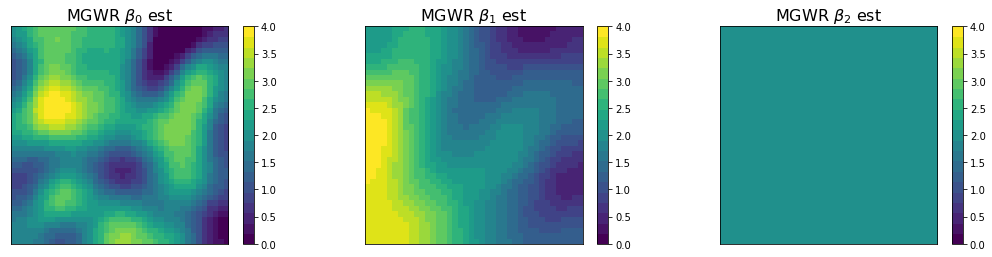

In [13]:
plot_s(np.array(mgwr_params).mean(axis=0).T,[r'MGWR $\beta_0$ est',r'MGWR $\beta_1$ est',r'MGWR $\beta_2$ est'], vmin=0,vmax=4)

plt.savefig("mgwr_mc.png",dpi=300)

In [14]:
gdf = gpd.read_file("grid_40_40.geojson")

In [15]:
%%time

from esda.moran import Moran
from libpysal.weights import Queen

w_res = Queen.from_dataframe(gdf)
w_res.transform = 'R'

mgwr_mi = []
for j in range(mc_inters):
    mgwr_mi.append(Moran(np.array(mgwr_res)[j,:],  w_res).I)

CPU times: user 1min 7s, sys: 750 ms, total: 1min 8s
Wall time: 1min 9s


In [16]:
print("MGWR Moran's I:", np.mean(mgwr_mi))

MGWR Moran's I: -0.048359890439143446


In [17]:
print("MGWR b0 est - b0:", np.mean(np.array(mgwr_params).mean(axis=0)[:,0] - b0))
print("MGWR b1 est - b1:", np.mean(np.array(mgwr_params).mean(axis=0)[:,1] - b1))
print("MGWR b2 est - b2:", np.mean(np.array(mgwr_params).mean(axis=0)[:,2] - b2))

MGWR b0 est - b0: 0.006181171239853096
MGWR b1 est - b1: -0.005119976200175762
MGWR b2 est - b2: -0.0004685983468486915


In [ ]:
bias1 = np.array(mgwr_params).mean(axis=0)[:,0] - b0
bias1 = np.mean(np.array(mgwr_params).mean(axis=0)[:,1] - b1)
bias1np.mean(np.array(mgwr_params).mean(axis=0)[:,2] - b2)

In [42]:
print("efficiency")
np.mean(np.std(np.array(mgwr_params),axis=0),axis=0)

efficiency


array([0.19053676, 0.13463311, 0.04189506])

In [20]:
mgwr_rslt_df = pd.DataFrame(np.array(mgwr_params).mean(axis=1),columns=['mgwr_b0_est','mgwr_b1_est',
                                                                          'mgwr_b2_est'])
mgwr_rslt_df['mgwr_moran'] = mgwr_mi

#mgwr_rslt_df['mgwr_rmse'] = mgwr_rmse

mgwr_rslt_df['mgwr_b0_est'] = np.sqrt(np.mean((np.array(mgwr_params)[:,:,0] - b0.reshape(1,-1))**2,axis=1))

mgwr_rslt_df['mgwr_b1_est'] = np.sqrt(np.mean((np.array(mgwr_params)[:,:,1] - b1.reshape(1,-1))**2,axis=1))

mgwr_rslt_df['mgwr_b2_est'] = np.sqrt(np.mean((np.array(mgwr_params)[:,:,2] - b2.reshape(1,-1))**2,axis=1))

mgwr_rslt_df.to_csv("mgwr_mc_results.csv")

In [21]:
pd.DataFrame(np.array(np.array(mgwr_res)[0,:]),columns=['mgwr_res']).to_csv("mgwr_res.csv")